In [191]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
from matplotlib.colors import Normalize
from matplotlib import cm
from matplotlib.tri import Triangulation

import ast

In [9]:
grid_search_results = []
with open('grid_search_results/both_overall-liking.txt', 'r') as file:
    inlist = 0
    for line in file.readlines():
        if line[0:4] == '----':
            grid_search_results.append([])
            continue

        if line[0] == '(':
            fixed_line = '[' + line.strip().replace(') (', '), (') + ']'
            params = ast.literal_eval(fixed_line)
            nested = [list(zip(key.split(','), np.array(val).flatten())) for (key, val) in params]
            unnested = [item for sublist in nested for item in sublist]
            grid_search_results[-1].append({key: val for (key, val) in unnested})
            grid_search_results[-1].append([])
            continue

        result = line

        if result[0] == '[':
            grid_search_results[-1][-1].append(ast.literal_eval(result))
            continue

        # grid_search_results[-1][-1].append(float(line.split('\t ')[1]))
grid_search_results = [(params, np.array(values)) for params, values in grid_search_results]

In [10]:
grid_search_results

[({'model_type': 'hyp',
   'num_hidden_layers': 0,
   'layer_size': 2,
   'lr': 0.005,
   'weight_decay': 0.001,
   'batch_size': 1024,
   'epochs': 50,
   'curvature': -1},
  array([[0.3252063 , 0.2525419 , 0.22067633, 0.206675  , 0.19950883,
          0.19081253, 0.17996249, 0.16712874, 0.1536692 , 0.13748907,
          0.11969768, 0.10110856, 0.08530506, 0.07107613, 0.05799554,
          0.04916428, 0.04462759, 0.04206499, 0.04040407, 0.03910466,
          0.03811685, 0.03737204, 0.03678312, 0.03633436, 0.03611643,
          0.03601883, 0.03595089, 0.0358705 , 0.03583248, 0.03585653,
          0.03588527, 0.0359265 , 0.03598877, 0.03603109, 0.0360376 ,
          0.03605089, 0.03605511, 0.03607557, 0.03604323, 0.03606018,
          0.03603546, 0.03607236, 0.0360344 , 0.03599854, 0.03603726,
          0.03599434, 0.03598128, 0.03593359, 0.03597334, 0.03593671],
         [0.2722079 , 0.21581817, 0.20810877, 0.20005201, 0.18910795,
          0.17403693, 0.15392116, 0.12861079, 0.0993142

In [48]:
params = np.array([p for p, _ in grid_search_results])
values = np.array([v for _, v in grid_search_results])
hyp_values, euc_values = values[:values.shape[0]//2], values[values.shape[0]//2:]

hyp_values.shape

(180, 3, 50)

In [96]:
hyp_mins, hyp_means, hyp_meds = hyp_values.mean(axis=1).min(axis=1), hyp_values.mean(axis=1).mean(axis=1), np.median(hyp_values.mean(axis=1), axis=1)
euc_mins, euc_means, euc_meds = euc_values.mean(axis=1).min(axis=1), euc_values.mean(axis=1).mean(axis=1), np.median(euc_values.mean(axis=1), axis=1)

red_hyp_mins, red_hyp_means, red_hyp_meds = hyp_mins.reshape(-1,3).min(axis=1), hyp_means.reshape(-1,3).min(axis=1), hyp_meds.reshape(-1,3).min(axis=1)
red_euc_mins, red_euc_means, red_euc_meds = euc_mins.reshape(-1,3).min(axis=1), euc_means.reshape(-1,3).min(axis=1), euc_meds.reshape(-1,3).min(axis=1)

hyp_mins.shape, red_hyp_mins.shape

((180,), (60,))

In [97]:
print(red_hyp_mins.mean())
print(red_hyp_means.mean())
print(red_hyp_meds.mean())
print()
print(red_euc_mins.mean())
print(red_euc_means.mean())
print(red_euc_meds.mean())

0.00942704243611111
0.023240300703775554
0.011875991885555557

0.014907395074666667
0.017947942242478886
0.016170576526916666


In [152]:
IN_SIZE = 89
OUT_SIZE = 1

NUM_HIDDEN_LAYERS = [0,1,2,4,8,16]
LAYER_SIZE = [2,4,8,16,32,64,128,256,512,1024]
LR = [0.005, 0.01, 0.02]

In [153]:
num_hidden_layers = np.array(NUM_HIDDEN_LAYERS).repeat(len(LAYER_SIZE))
layer_size = np.tile(LAYER_SIZE, len(NUM_HIDDEN_LAYERS))

naive_sizes = (num_hidden_layers * layer_size**2).flatten()
real_sizes = (num_hidden_layers * layer_size**2).flatten() + ((np.zeros_like(num_hidden_layers) + (IN_SIZE+OUT_SIZE))*layer_size).flatten()

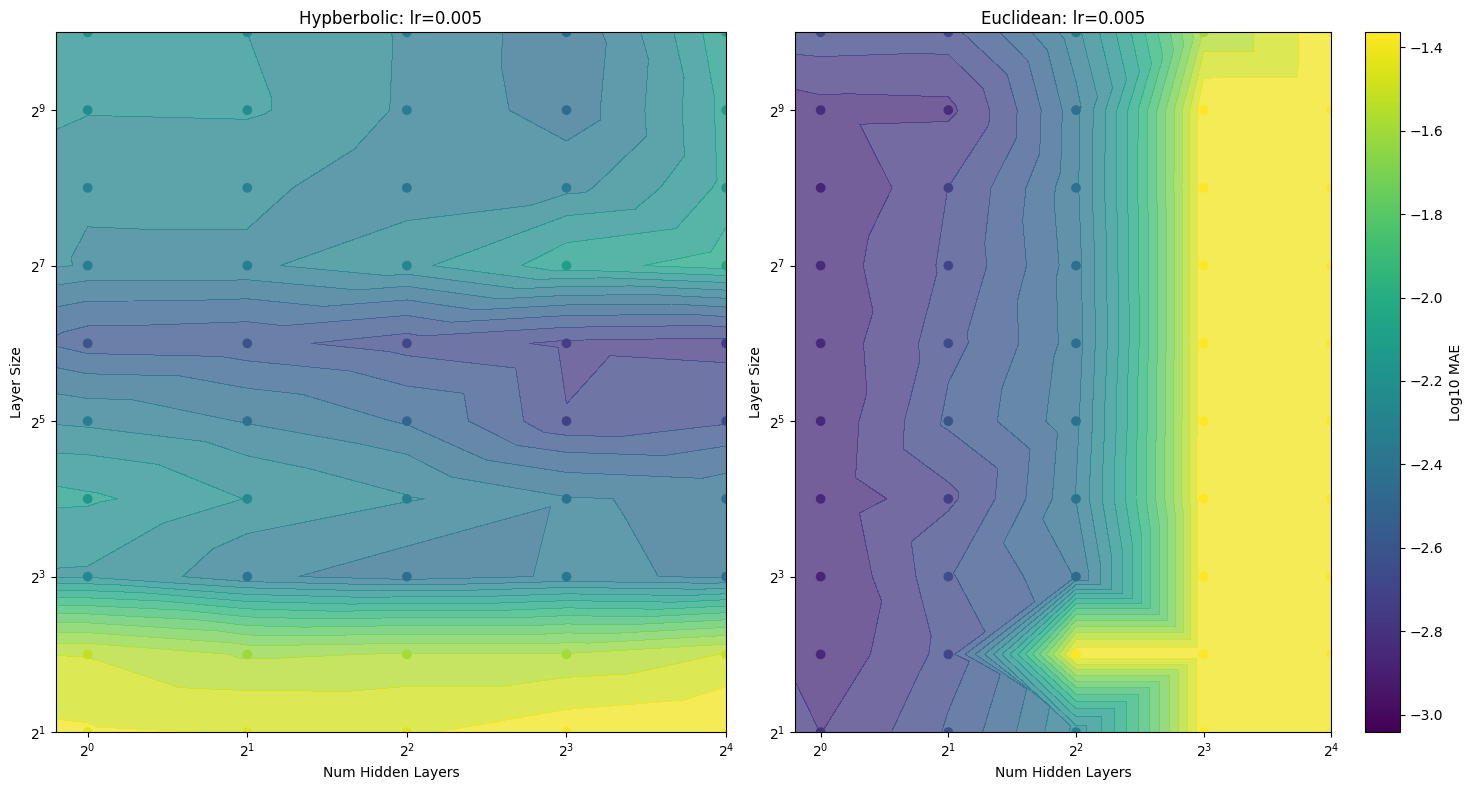

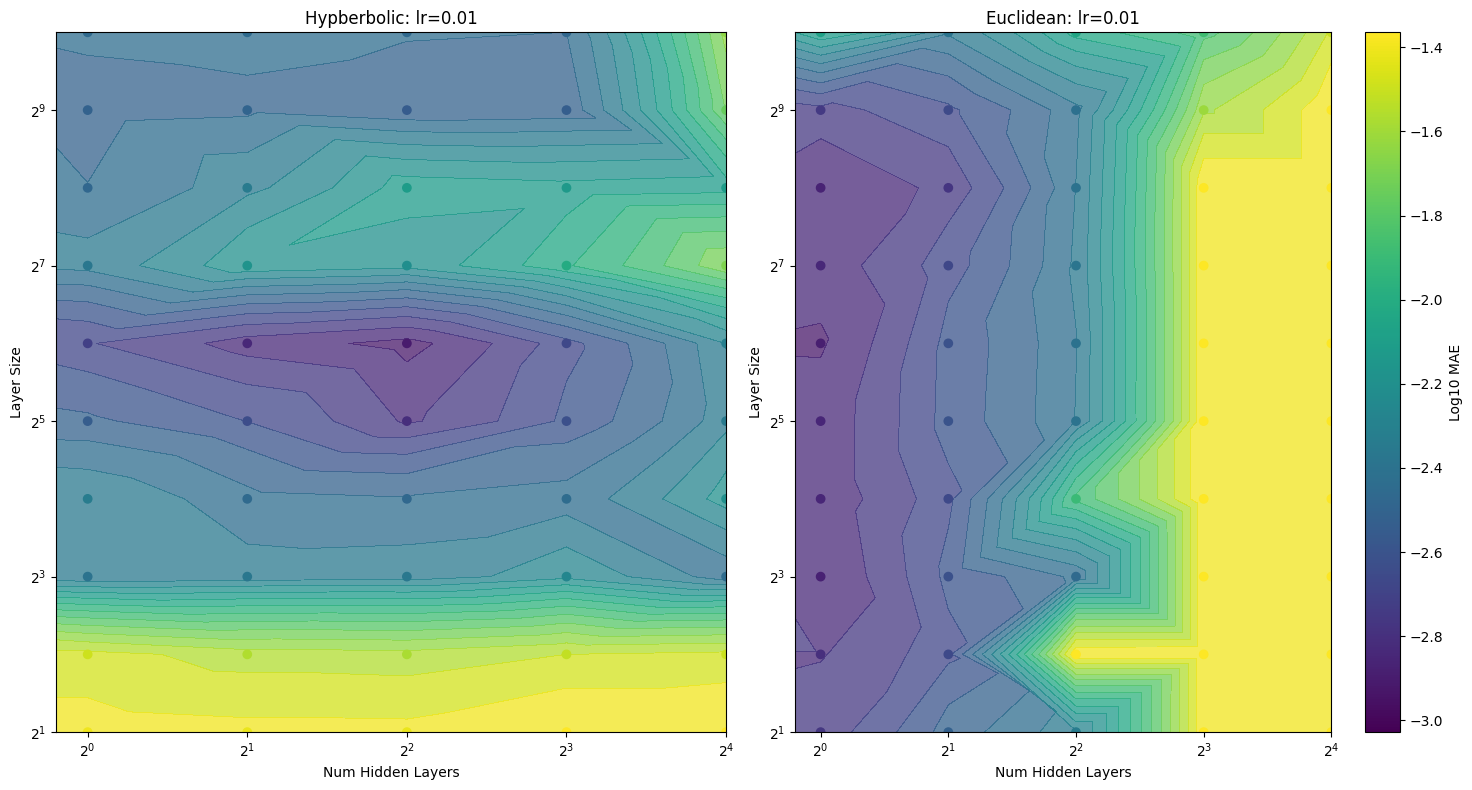

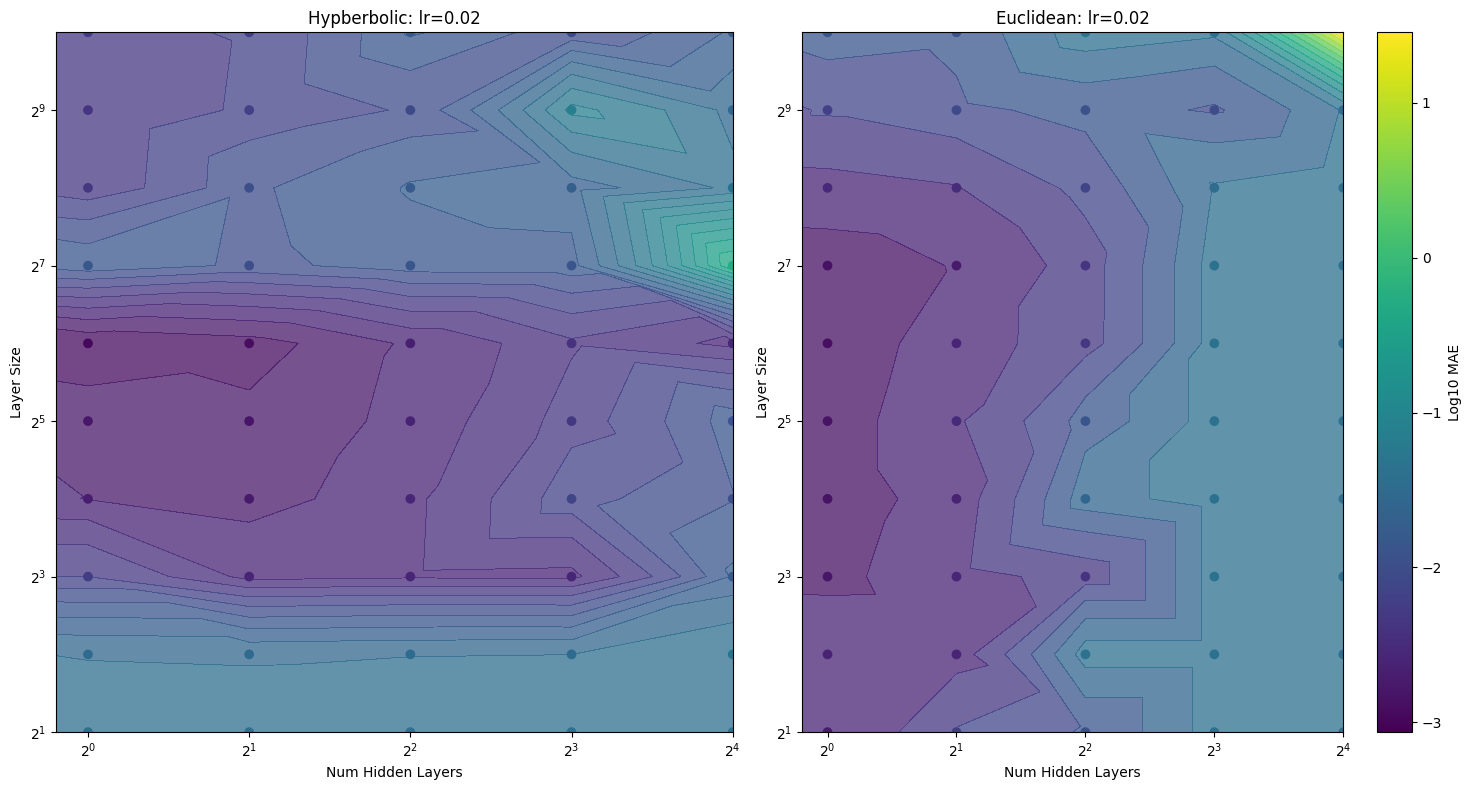

In [215]:
for i, lr in enumerate(LR):
    hyp_data = np.log10(hyp_mins.reshape(-1,3)[:,i])
    euc_data = np.log10(euc_mins.reshape(-1,3)[:,i])

    min_val = min(np.min(hyp_data), np.min(euc_data))
    max_val = max(np.max(hyp_data), np.max(euc_data))

    cmap = plt.cm.viridis
    norm = Normalize(vmin=min_val, vmax=max_val)

    tri = Triangulation(num_hidden_layers, layer_size)  #create tri mesh

    plt.figure(figsize=(15,8))



    plt.subplot(121)
    ctf = plt.tricontourf(tri, hyp_data, levels=20, cmap=cmap, norm=norm, alpha=0.75)
    plt.scatter(num_hidden_layers, layer_size, c=hyp_data, cmap=cmap, norm=norm)

    plt.title(f'Hypberbolic: lr={lr}')
    plt.xlabel('Num Hidden Layers')
    plt.ylabel('Layer Size')

    plt.xscale('log', base=2)
    plt.yscale('log', base=2)


    plt.subplot(122)
    ctf = plt.tricontourf(tri, euc_data, levels=20, cmap=cmap, norm=norm, alpha=0.75)
    euc_scatter = plt.scatter(num_hidden_layers, layer_size, c=euc_data, cmap=cmap, norm=norm)
    plt.colorbar(euc_scatter, label='Log10 MAE')


    plt.title(f'Euclidean: lr={lr}')
    plt.xlabel('Num Hidden Layers')
    plt.ylabel('Layer Size')

    plt.xscale('log', base=2)
    plt.yscale('log', base=2)

    plt.tight_layout()
    plt.show()